## 1. Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## 2. Carga de los datasets

In [5]:
# Carga CSV
bank_df = pd.read_csv('datasets/bank-additional.csv', sep=',')

# Cargamos las 3 hojas del Excel
excel_file = 'datasets/customer-details.xlsx'
customer_2012 = pd.read_excel(excel_file, sheet_name=0)
customer_2013 = pd.read_excel(excel_file, sheet_name=1)
customer_2014 = pd.read_excel(excel_file, sheet_name=2)

# Unimos todas las hojas en un solo DataFrame
customer_df = pd.concat([customer_2012, customer_2013, customer_2014], ignore_index=True)

## 3. Exploración inicial

In [6]:
# Visualizamos primeras filas del dataset bancario
bank_df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [4]:
# Visualizamos primeras filas del dataset de clientes
customer_df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [11]:
# Información general
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

In [12]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB
None


## 4. Limpieza y transformación de datos

In [9]:
# Revisamos valores nulos
print(bank_df.isnull().sum())

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64


In [10]:
print(customer_df.isnull().sum())

Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64


In [13]:
# Convertimos columnas categóricas a minúsculas (para uniformidad)
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'y']
for col in cat_cols:
    bank_df[col] = bank_df[col].str.lower()

In [14]:
# Convertir fechas
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'])

In [ ]:
# Unimos datasets por ID
merged_df = bank_df.merge(customer_df, left_on='id_', right_on='ID', how='left')

## 5. Análisis descriptivo

In [16]:
# Estadísticas básicas
bank_df.describe()

,Unnamed: 0,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,latitude,longitude
count,43000.000000,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,20651.099047,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,36.856697,-95.939067
std,11868.770913,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,7.225948,16.752282
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,24.396000,-124.997000
25%,10381.750000,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,30.614750,-110.494250
50%,20642.500000,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,36.761000,-95.899500
75%,30930.250000,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,43.113250,-81.427750
max,41187.000000,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,49.384000,-66.937000


In [17]:
# Distribución del objetivo
bank_df['y'].value_counts(normalize=True)

y
no     0.887349
yes    0.112651
Name: proportion, dtype: float64

In [18]:
# Edad media por estado civil
bank_df.groupby('marital')['age'].mean()

marital
divorced    44.965712
married     42.244398
single      33.104863
Name: age, dtype: float64

In [19]:
# Ingresos promedio por número de hijos
merged_df['TotalKids'] = merged_df['Kidhome'] + merged_df['Teenhome']
merged_df.groupby('TotalKids')['Income'].mean()

TotalKids
0    92806.017459
1    93071.350800
2    92943.978861
3    94045.320667
4    93278.521684
Name: Income, dtype: float64

## 6. Visualización de datos

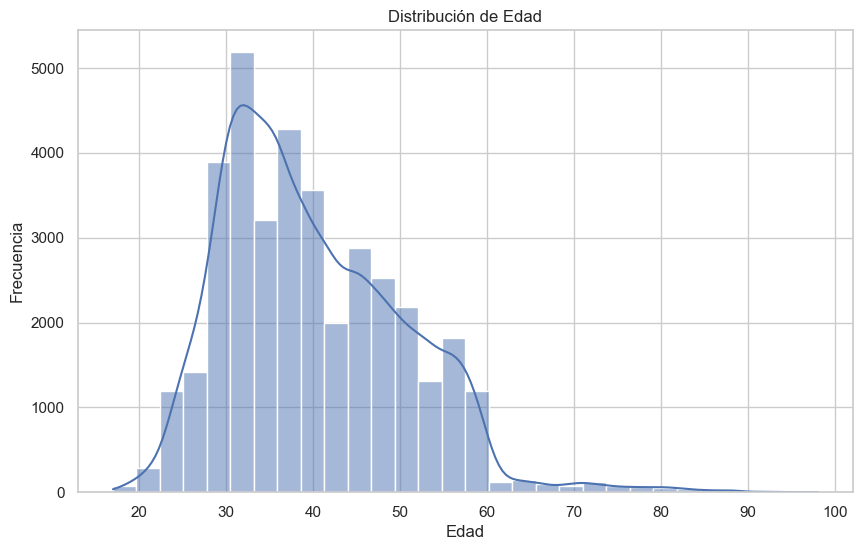

In [20]:
# Distribución de edad
sns.histplot(bank_df['age'], bins=30, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

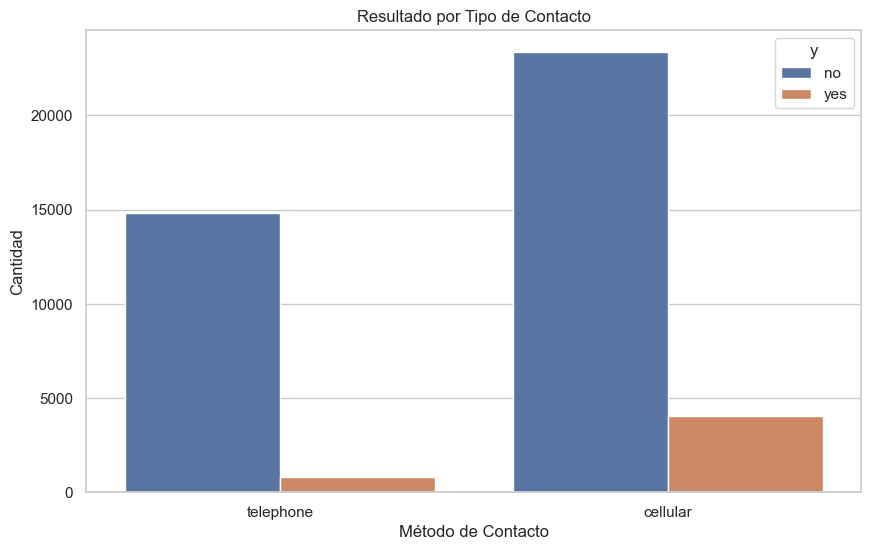

In [21]:
# Proporción de suscripciones por tipo de contacto
sns.countplot(data=bank_df, x='contact', hue='y')
plt.title("Resultado por Tipo de Contacto")
plt.xlabel("Método de Contacto")
plt.ylabel("Cantidad")
plt.show()

In [28]:
# Ver tipos de datos
print(merged_df.dtypes)

Unnamed: 0_x                  int64
age                         float64
job                          object
marital                      object
education                    object
default                     float64
housing                     float64
loan                        float64
contact                      object
duration                      int64
campaign                      int64
pdays                         int64
previous                      int64
poutcome                     object
emp.var.rate                float64
cons.price.idx               object
cons.conf.idx                object
euribor3m                    object
nr.employed                  object
y                            object
date                         object
latitude                    float64
longitude                   float64
id_                          object
Unnamed: 0_y                  int64
Income                        int64
Kidhome                       int64
Teenhome                    

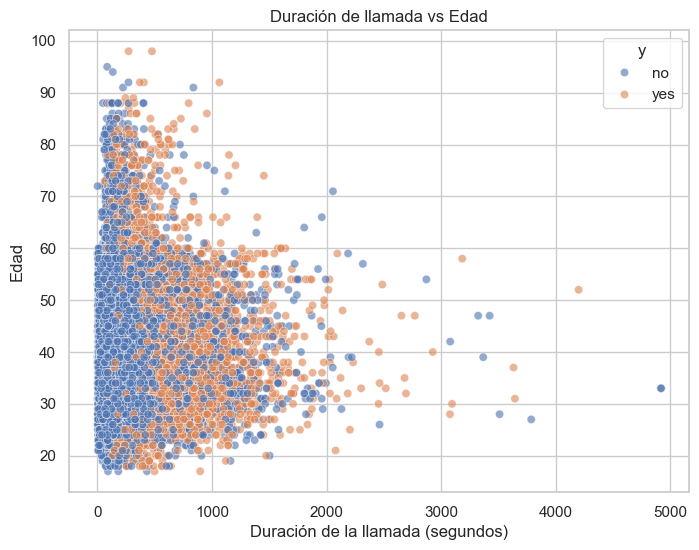

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='age', hue='y', data=merged_df, alpha=0.6)
plt.title("Duración de llamada vs Edad")
plt.xlabel("Duración de la llamada (segundos)")
plt.ylabel("Edad")
plt.grid(True)
plt.show()


## 7. Informe

### Informe del Análisis Exploratorio de Datos (EDA)

Se ha realizado un EDA sobre los datos de campañas de marketing de un banco portugués. El dataset bancario contiene información detallada sobre las campañas telefónicas, mientras que el archivo Excel complementa con datos demográficos de los clientes.

### Puntos Clave:

- La mayoría de los clientes no suscriben al producto ofrecido (~88%).
- El contacto a través de celular es más efectivo que el telefónico.
- Las campañas son más exitosas cuando la duración de la llamada es mayor.
- Los ingresos promedio son más altos entre quienes sí suscribieron el producto.
- El número de niños y adolescentes en casa parece tener poco impacto directo en la suscripción.

Este análisis puede servir como base para construir modelos predictivos de éxito en campañas de marketing o para segmentar clientes de forma más eficaz.
